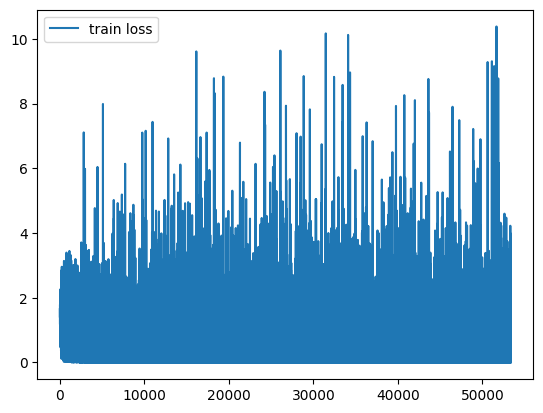

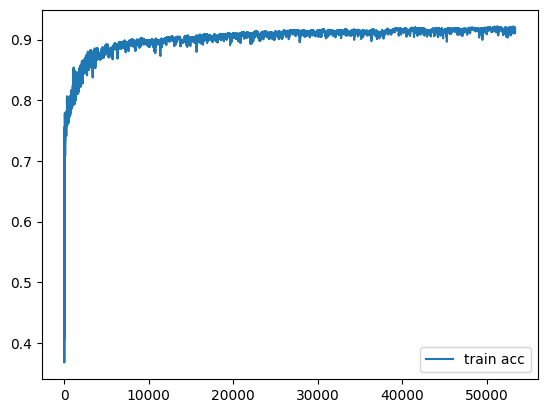

In [ ]:
import torch
#データセットとデータローダ(データセットの中身をミニバッチごとに固めた集合)の作成に必要
from torch.utils.data import TensorDataset, DataLoader
#プログレスバーの表示
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
torch.manual_seed(0)
#モデルの作成
class LogisticRegression(torch.nn.Module):
  #torch.nn.Moduleのサブクラス化(クラスの継承)
    def __init__(self):
        super().__init__()
        self.net = torch.nn.Sequential(torch.nn.Linear(300, 4),)
    def forward(self, X):
        return self.net(X)

model = LogisticRegression()
X_train = torch.load("/content/drive/MyDrive/X_train.pt")
y_train = torch.load("/content/drive/MyDrive/y_train.pt")
#TensorDatasetを作成
ds = TensorDataset(X_train, y_train)
# DataLoaderを作成
loader = DataLoader(ds, batch_size=1, shuffle=True)
#交差エンドロピー損失を計算する
loss_fn = torch.nn.CrossEntropyLoss()
#73の反省を踏まえて、学習率を0.1にする
optimizer = torch.optim.SGD(model.net.parameters(), lr=0.1)
epochs=10
train_losses = []
train_accs = []
for epoch in range(epochs):
    for xx, yy in loader:
        y_pred = model(xx)
        #損失の計算
        loss = loss_fn(y_pred, yy)
        #勾配の初期化
        optimizer.zero_grad()
        #勾配を計算(逆伝播)
        loss.backward()
        #パラメータの更新
        optimizer.step()
        #評価
        model.eval()
        #損失と正解率を求めて、リストに追加する
        train_losses.append(loss.detach().numpy())
        y_max_train, y_pred_train = torch.max(model(X_train),dim=1)
        train_acc = accuracy_score(y_pred_train, y_train)
        train_accs.append(train_acc)

        #モデルを保存
        torch.save(model.state_dict(), f"model_epoch{epoch}.pt")


#損失の変化をプロット
fig = plt.figure()
plt.plot(train_losses, label="train loss")
#凡例
plt.legend()
#保存
plt.savefig("/content/drive/MyDrive/loss.png")

#正解率の変化をプロット
fig = plt.figure()
plt.plot(train_accs, label="train acc")
#凡例
plt.legend()
plt.savefig("/content/drive/MyDrive/acc.png")